In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

df = pd.read_csv("predicted_scenarios.csv")
df["Year"] = df["Year"].astype(int)

scenario_columns = [
    ("Pred_baseline", "Baseline"),
    ("Pred_minus10", "-10%"),
    ("Pred_plus10", "+10%"),
    ("Pred_plus20", "+20%"),
    ("Pred_slow75", "-25%"),
    ("Pred_fast150", "+50%"),
    ("Pred_ban0", "x0")
]

value_vars = [col for col, _ in scenario_columns]

df_long = df.melt(
    id_vars=["State", "Year"],
    value_vars=value_vars,
    var_name="Scenario",
    value_name="PredictedPrice"
)

# Replace column names with clean scenario labels
mapping = {col: name for col, name in scenario_columns}
df_long["Scenario"] = df_long["Scenario"].map(mapping)

print(df_long.head())

  State  Year  Scenario  PredictedPrice
0    AZ  2014  Baseline        0.099431
1    AZ  2015  Baseline        0.099506
2    AZ  2016  Baseline        0.101296
3    AZ  2017  Baseline        0.103482
4    AZ  2018  Baseline        0.104060


In [19]:
# -------------------------------------------------------------------
# Unique states and scenarios
# -------------------------------------------------------------------
states = sorted(df_long["State"].unique())
scenarios = df_long["Scenario"].unique()

# Pick a colormap with enough distinct colors
cmap = get_cmap("tab20")
color_map = {state: cmap(i % 20) for i, state in enumerate(states)}

/tmp/ipykernel_2998261/2928844403.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab20")


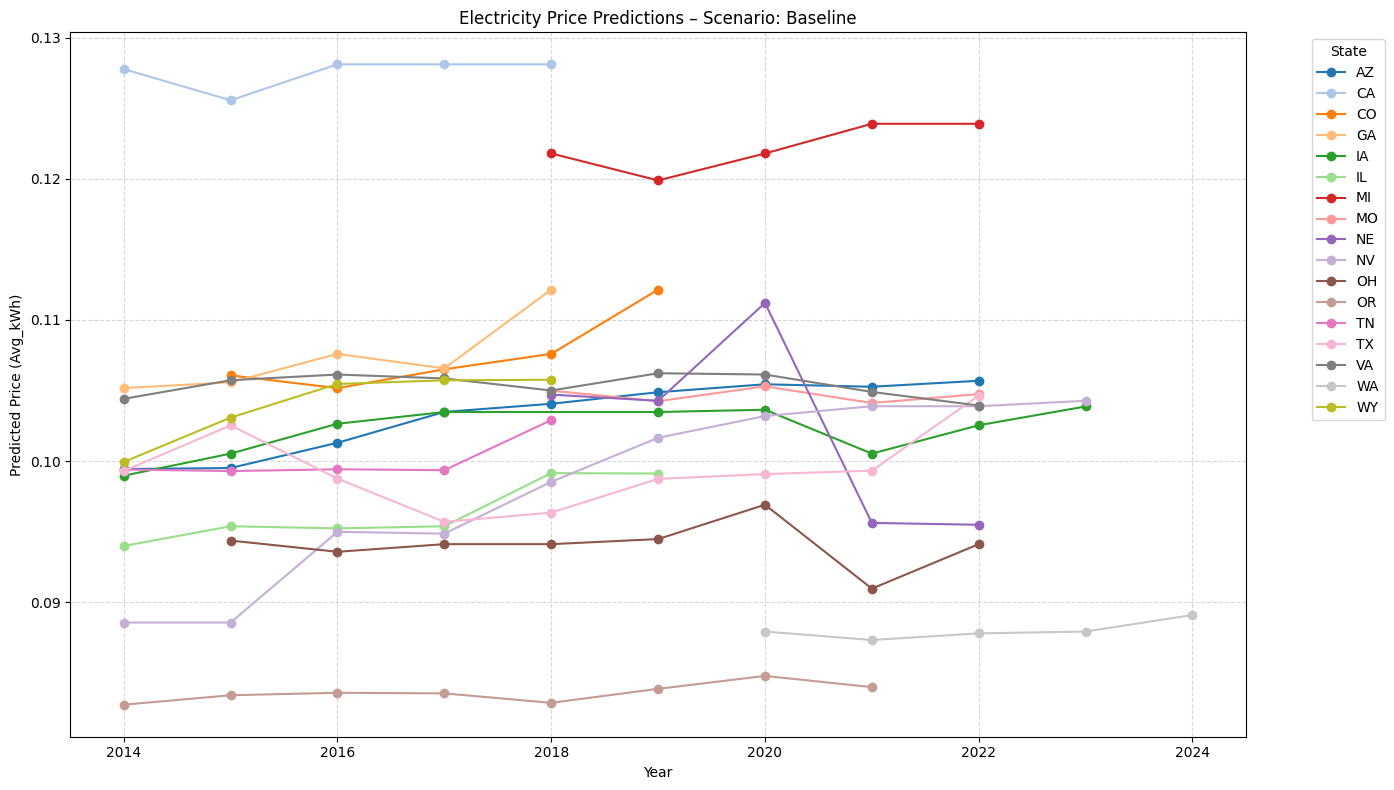

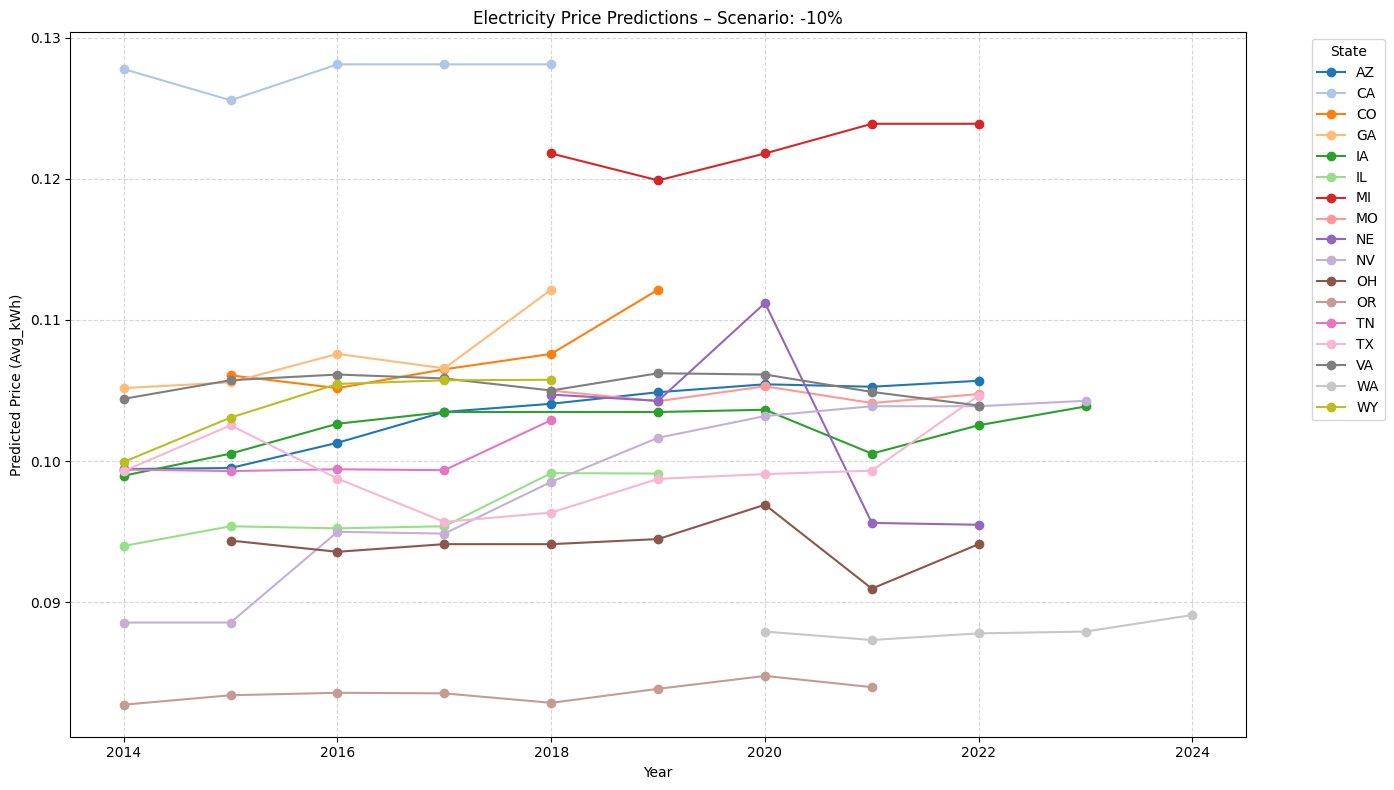

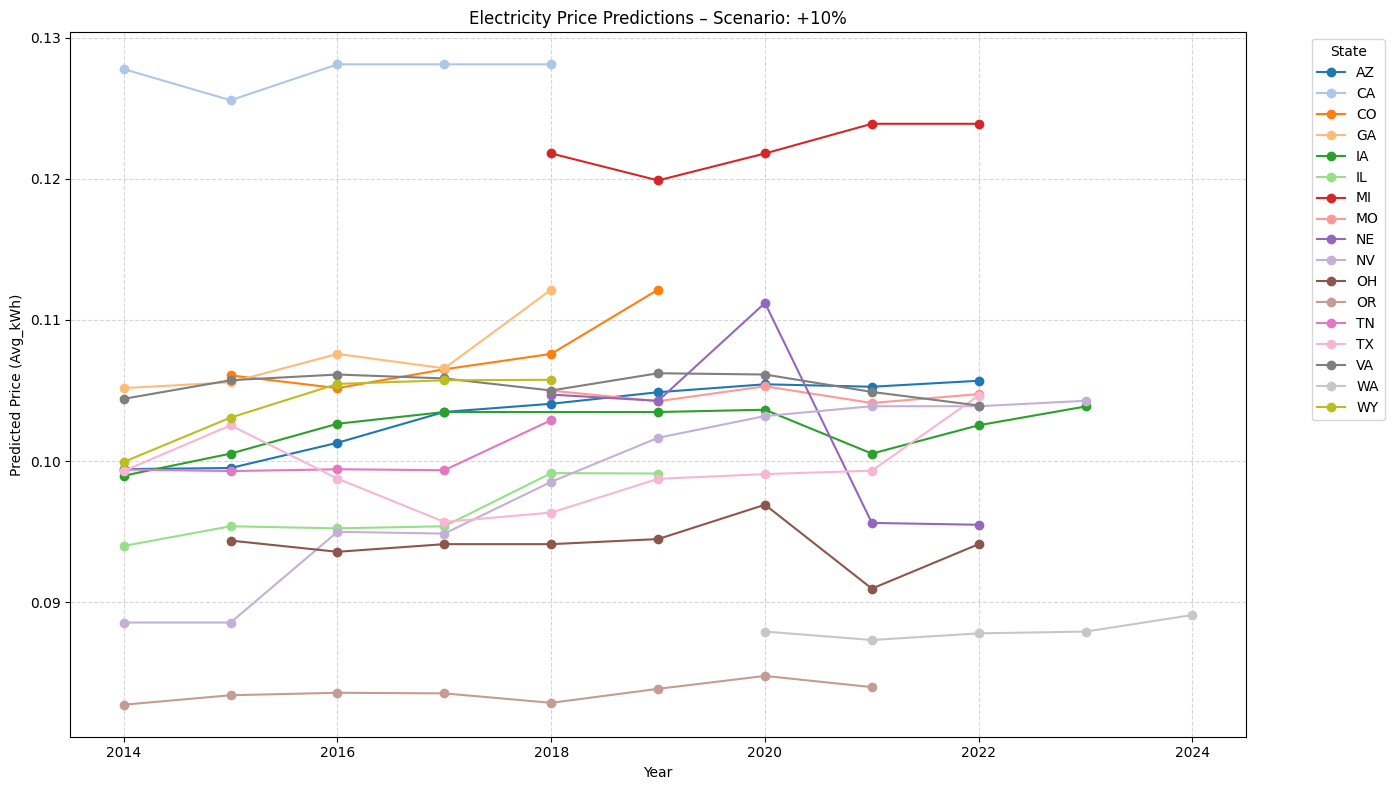

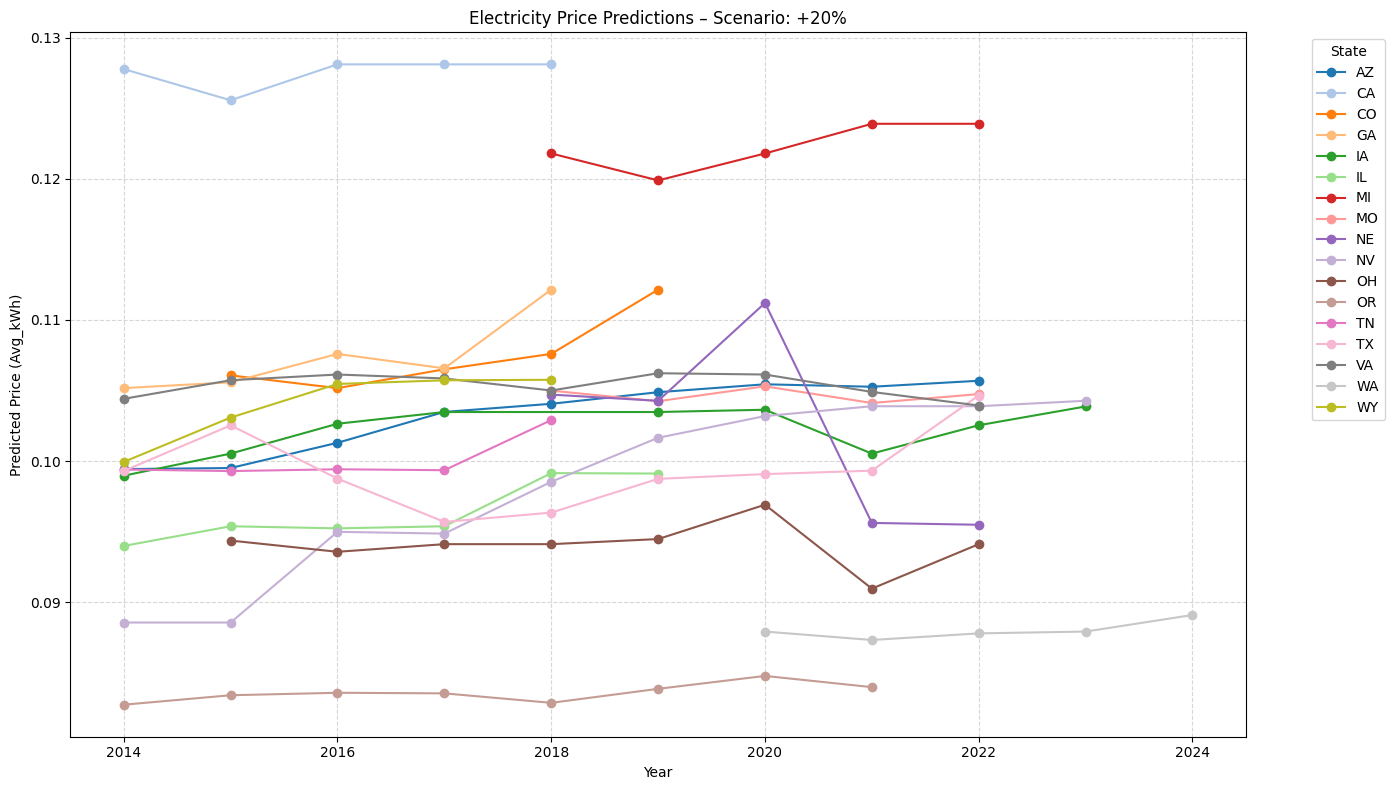

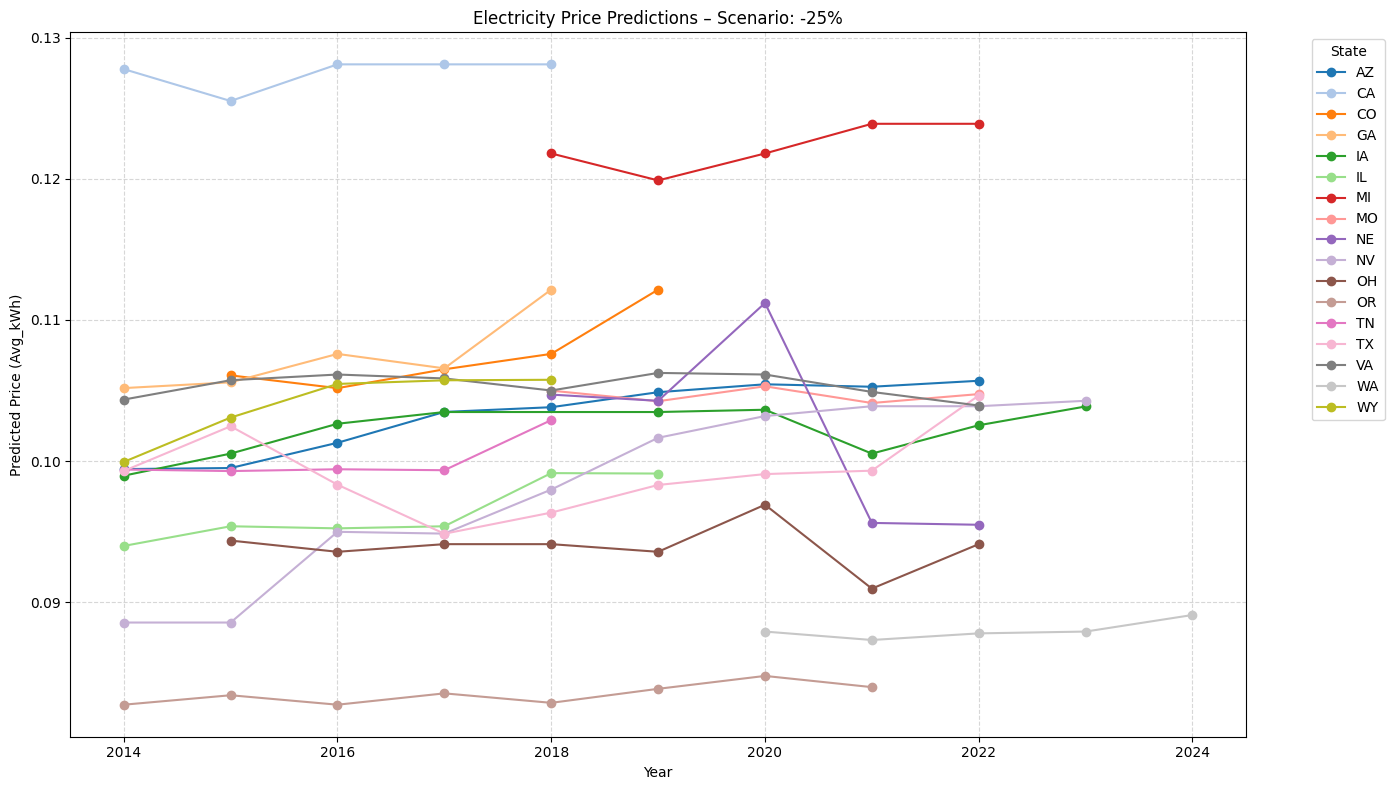

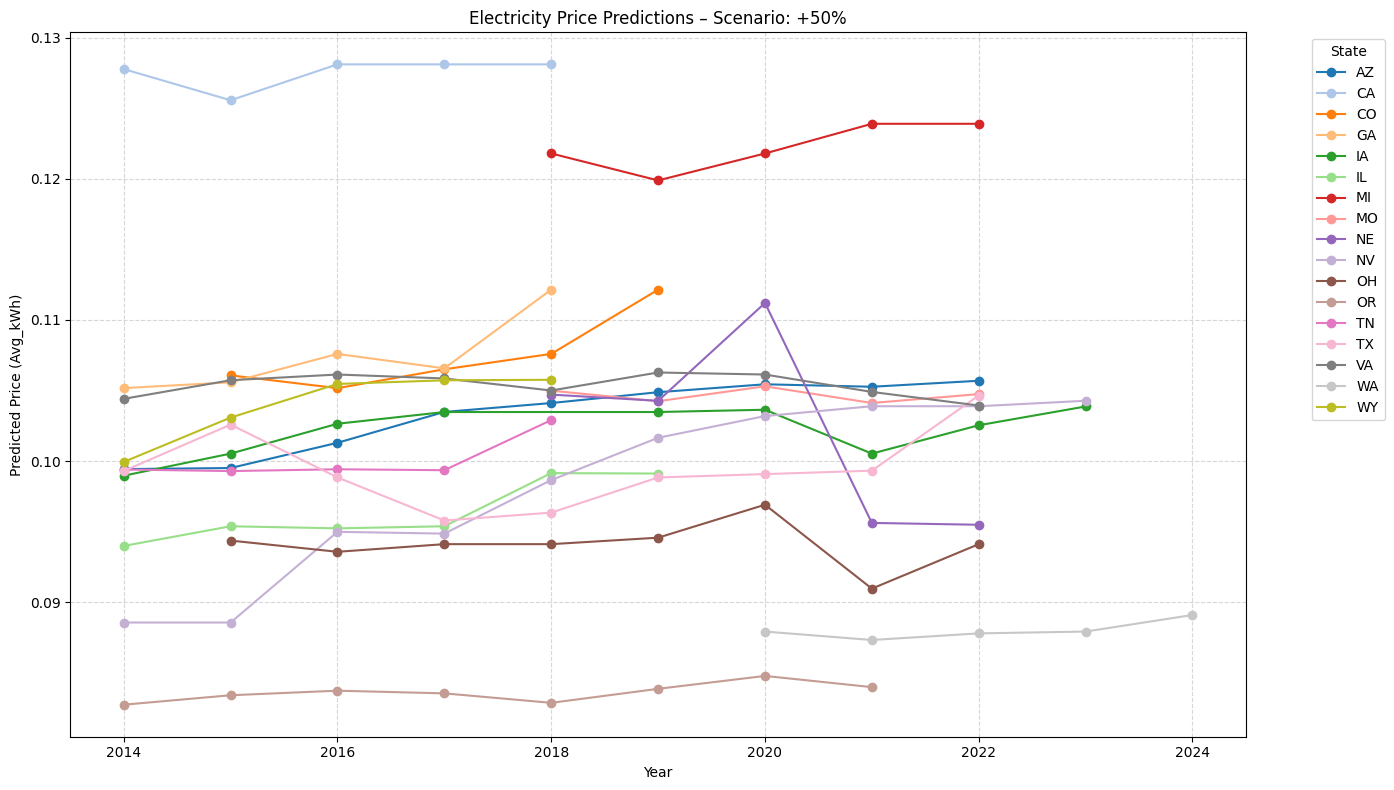

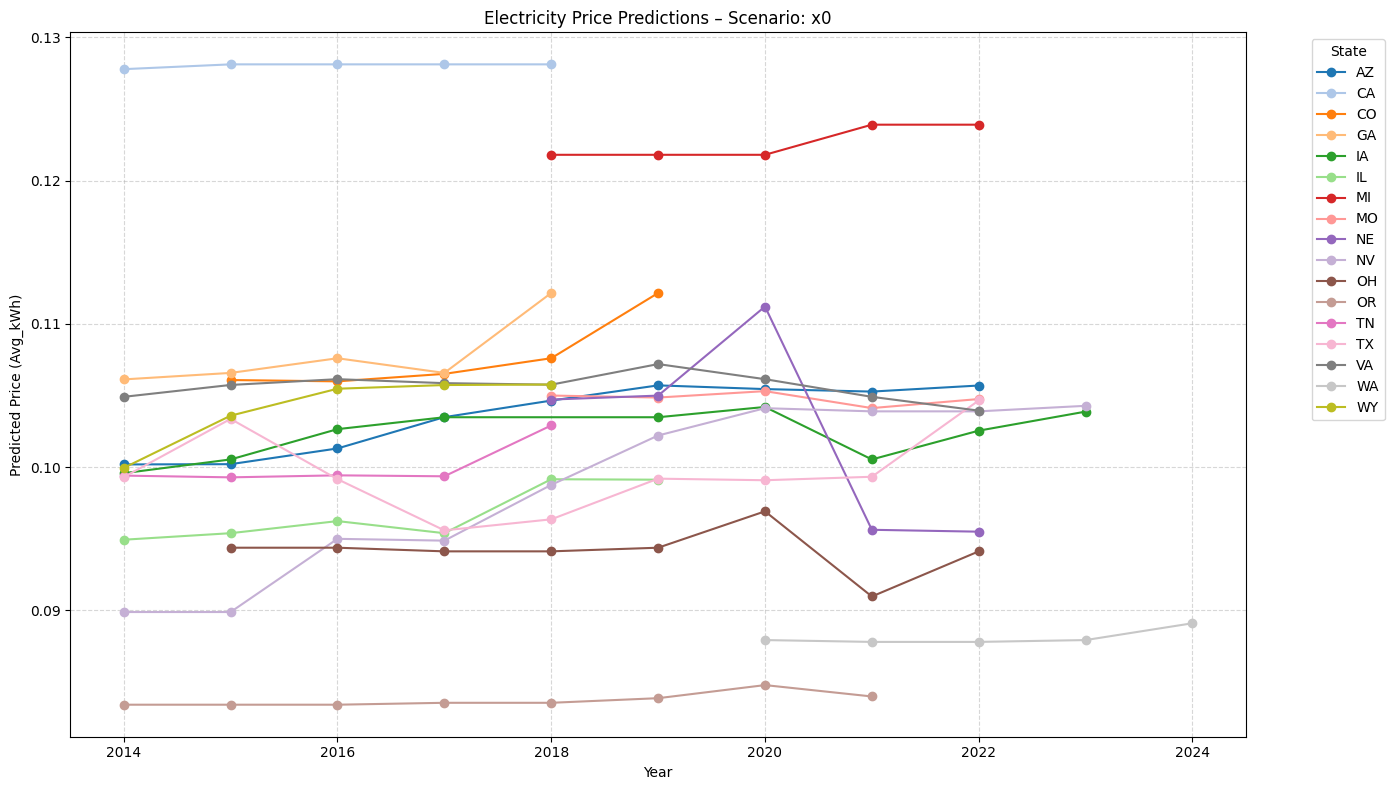

In [20]:
for scenario in scenarios:
    scenario_df = df_long[df_long["Scenario"] == scenario]

    plt.figure(figsize=(14, 8))

    for state in states:
        sdata = scenario_df[scenario_df["State"] == state]

        if len(sdata) == 0:
            continue

        plt.plot(
            sdata["Year"],
            sdata["PredictedPrice"],
            marker="o",
            color=color_map[state],
            label=state
        )

    plt.title(f"Electricity Price Predictions – Scenario: {scenario}")
    plt.xlabel("Year")
    plt.ylabel("Predicted Price (Avg_kWh)")

    # Reduce legend clutter by putting it on the side
    plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()

    # Save if desired
    # plt.savefig(f"scenario_{scenario}.png", dpi=200)

    plt.show()

/tmp/ipykernel_2998261/1575052923.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("tab10")


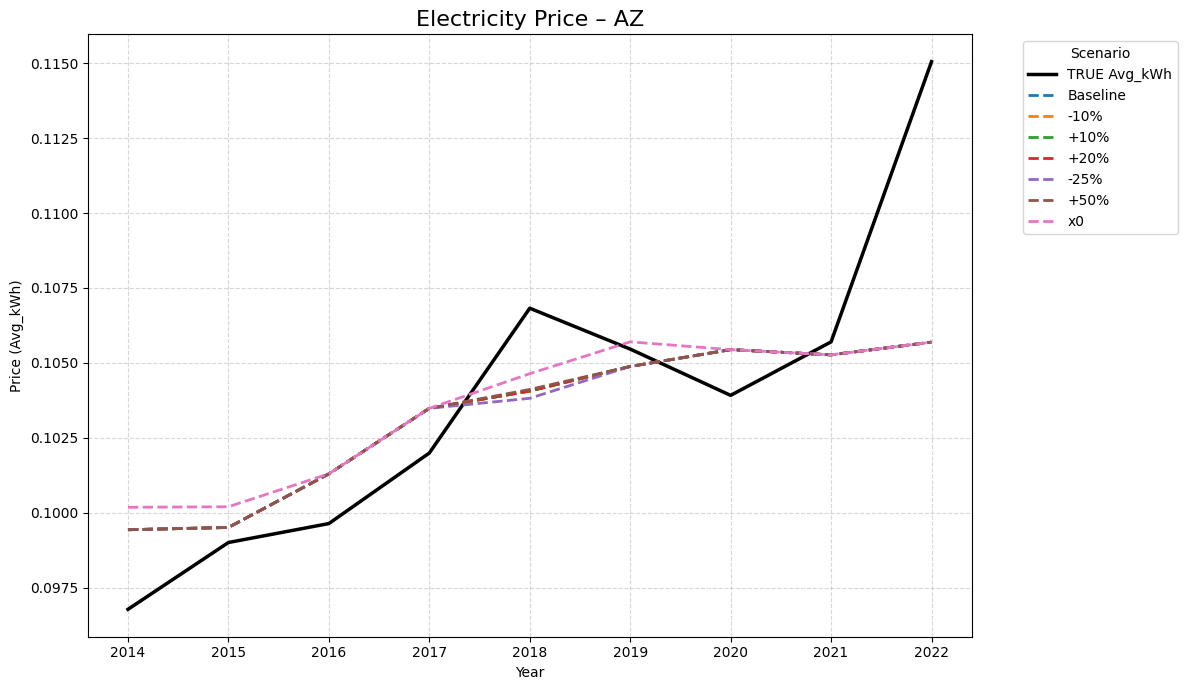

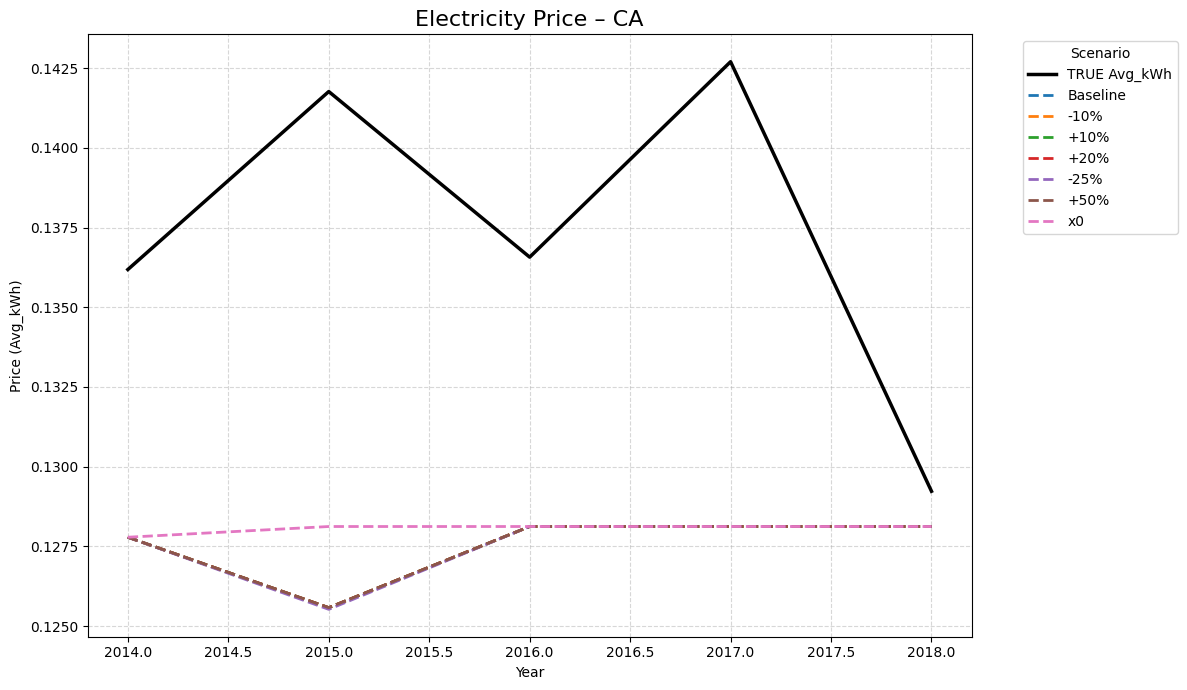

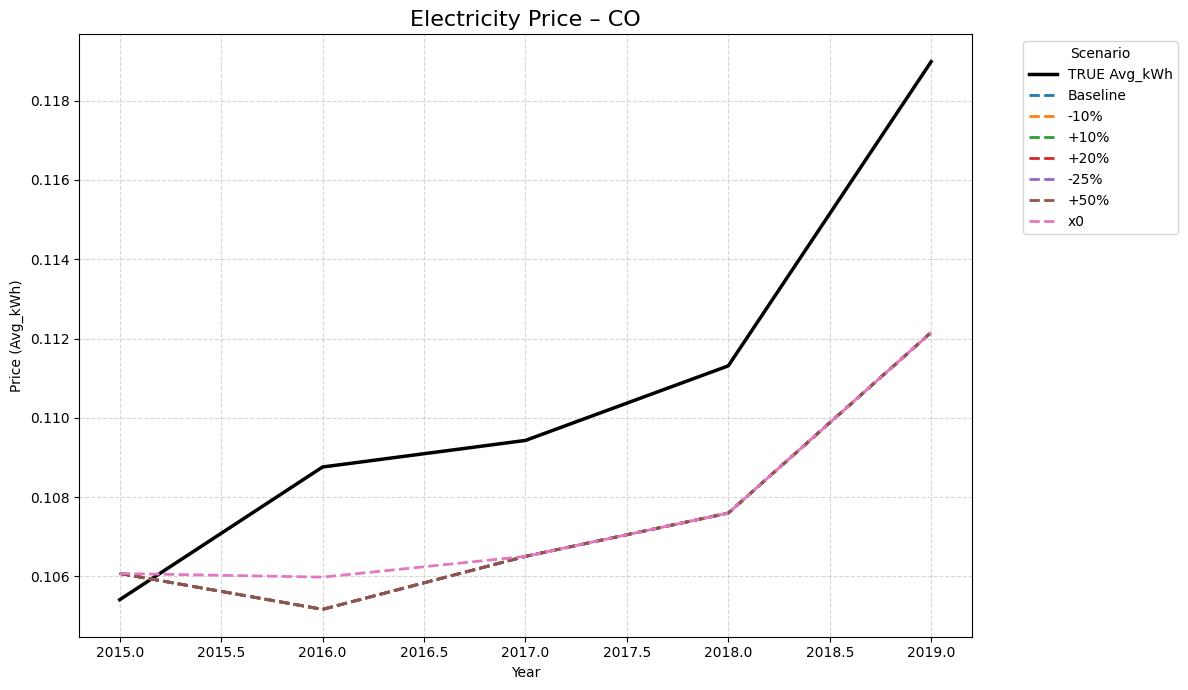

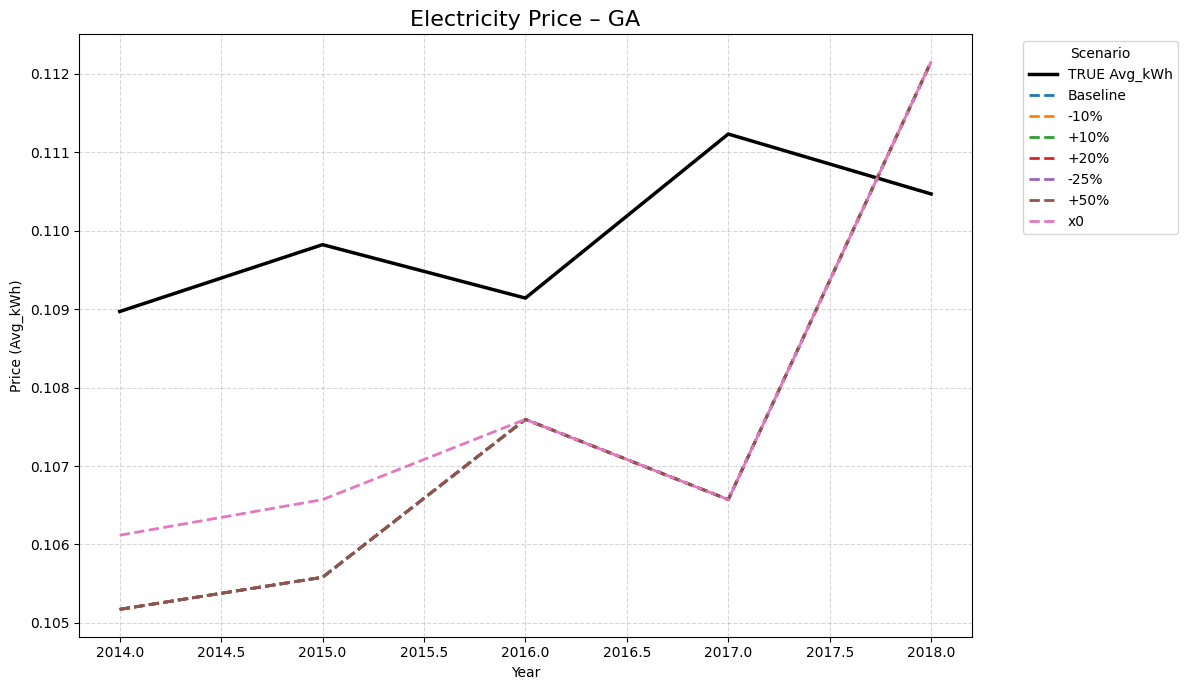

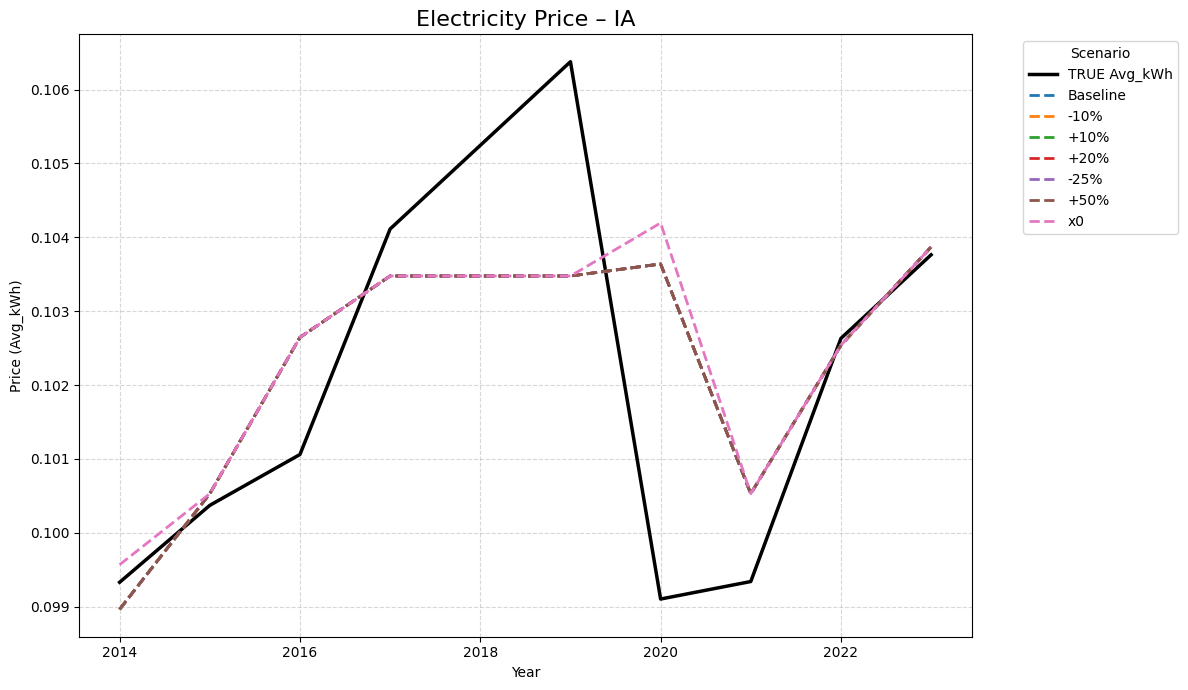

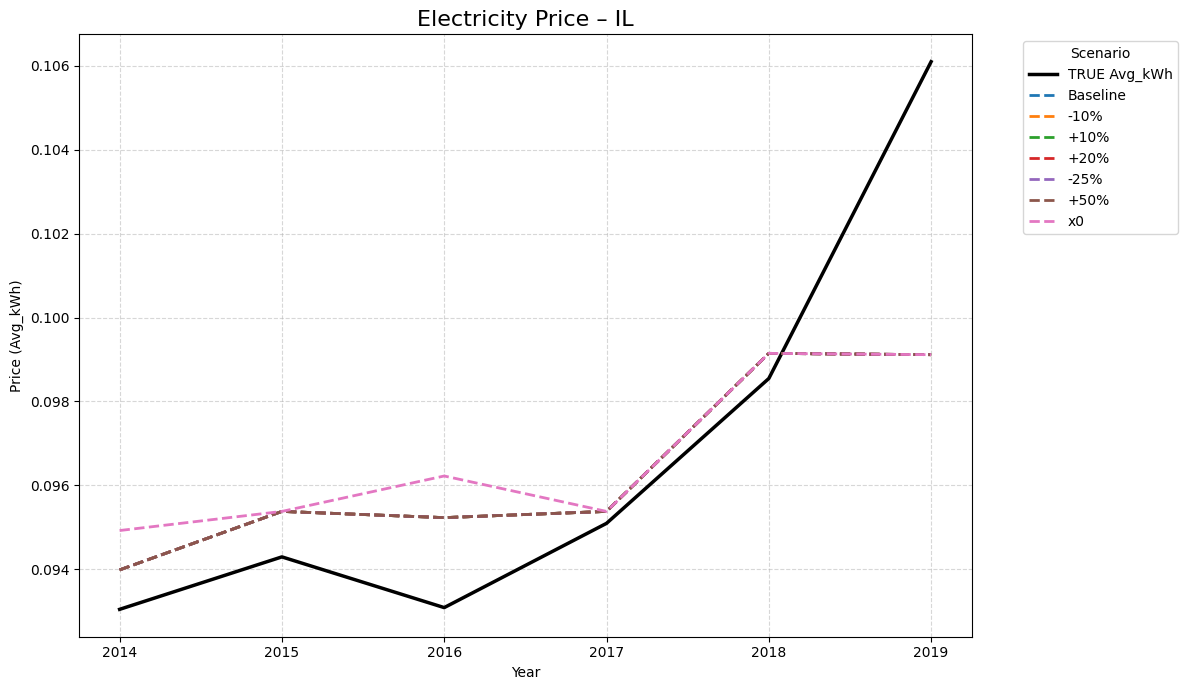

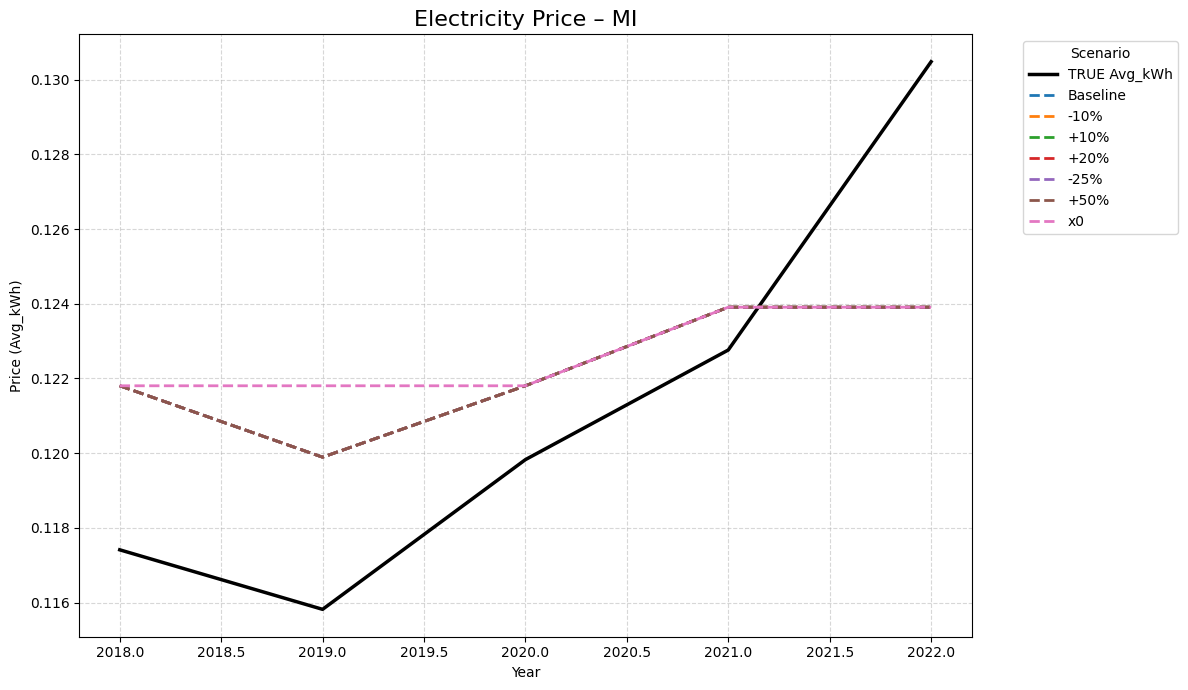

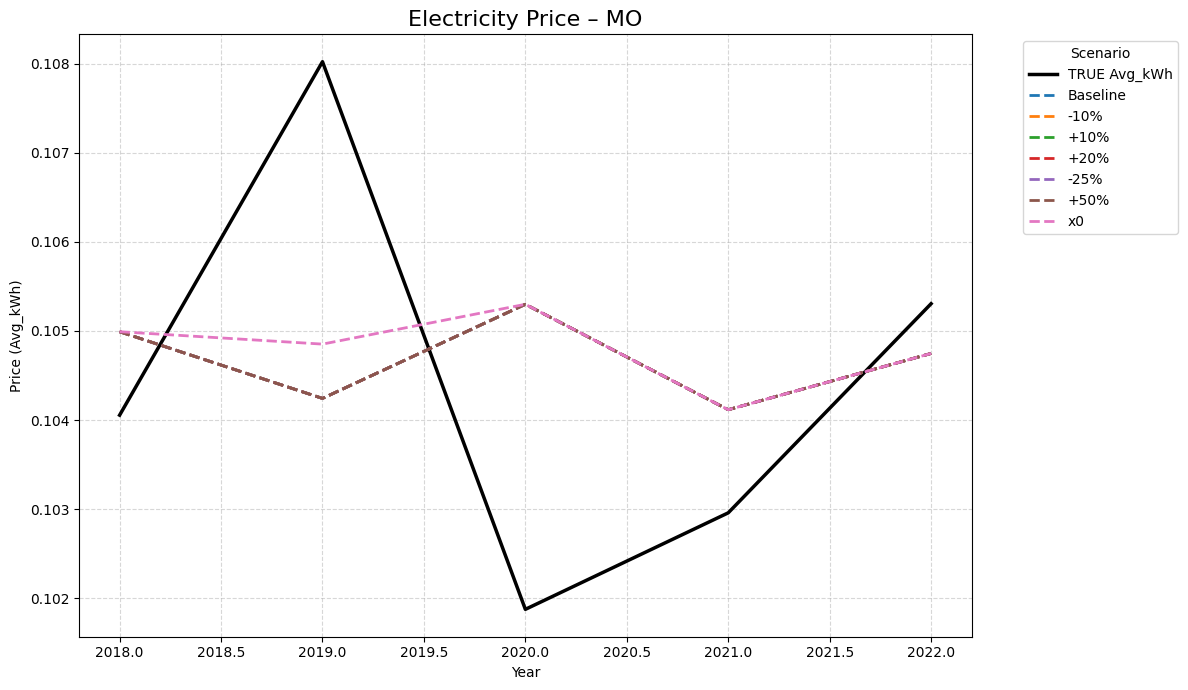

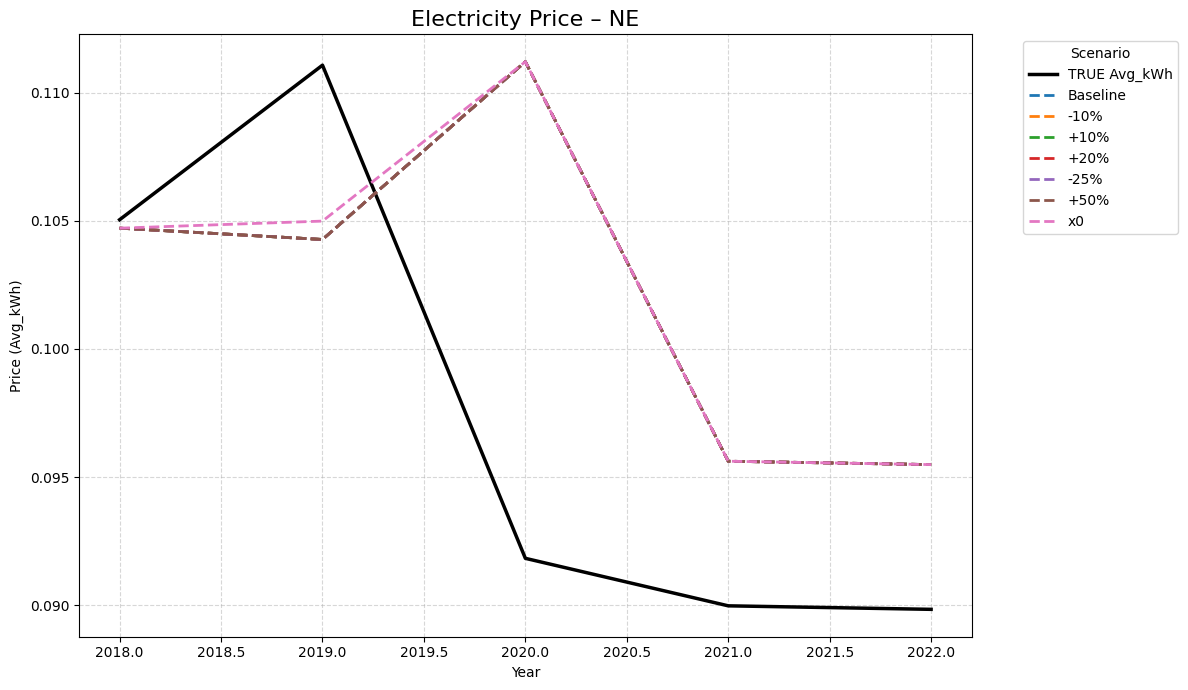

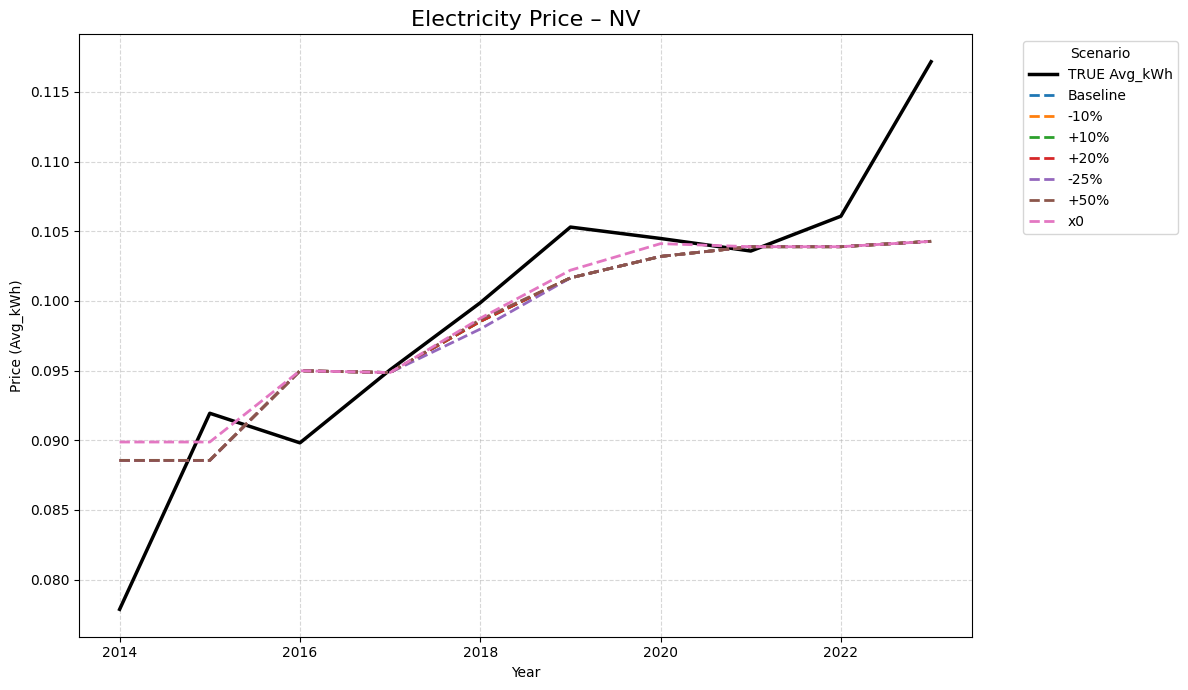

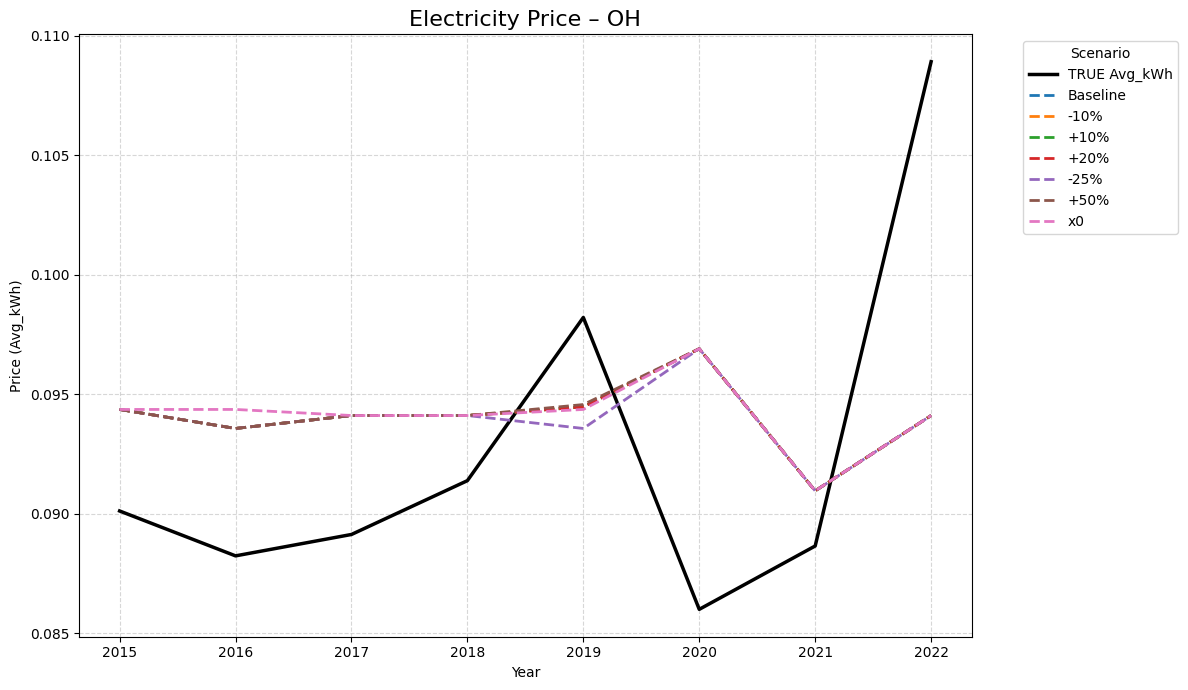

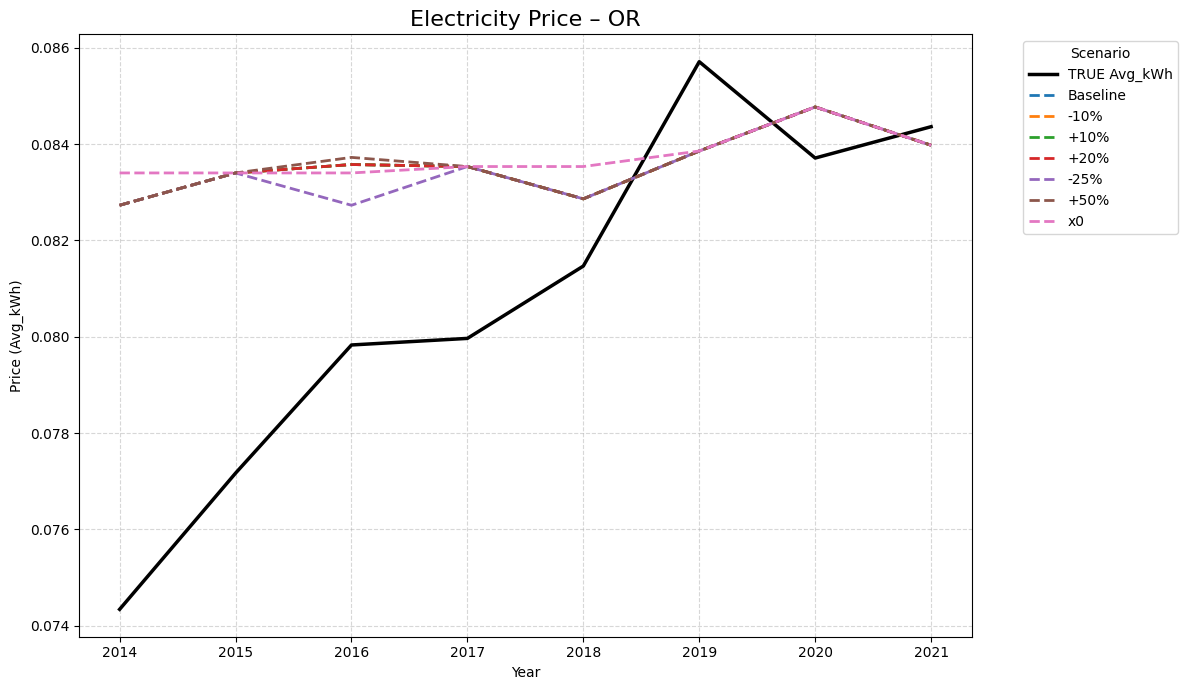

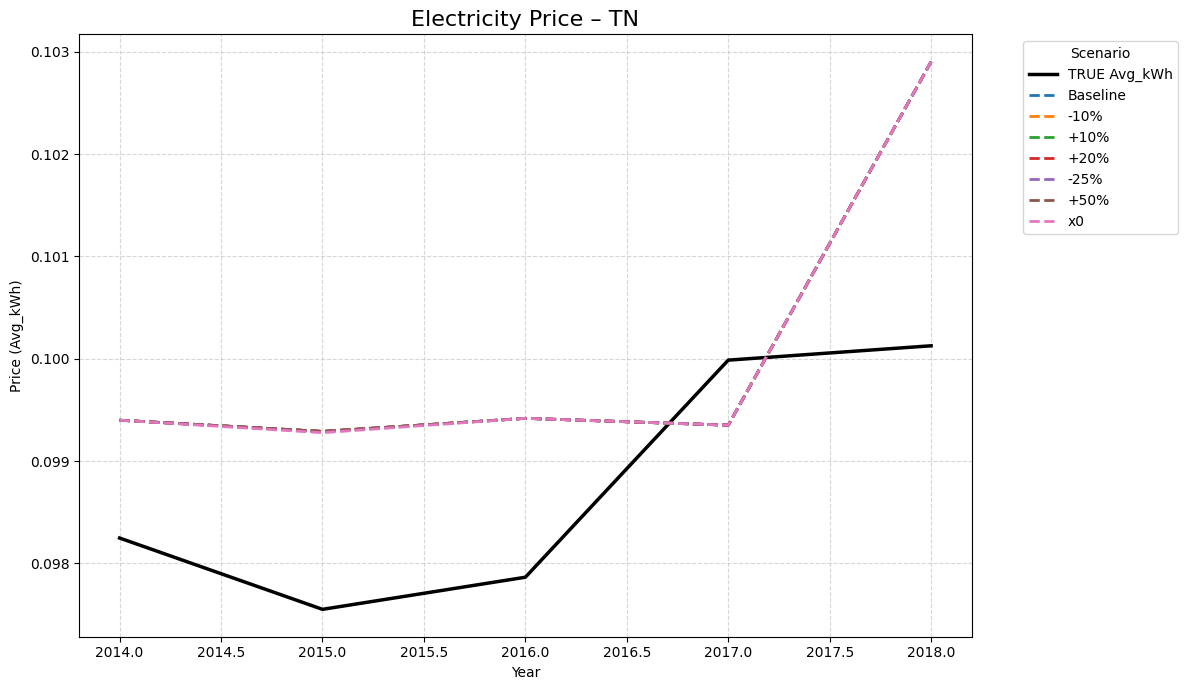

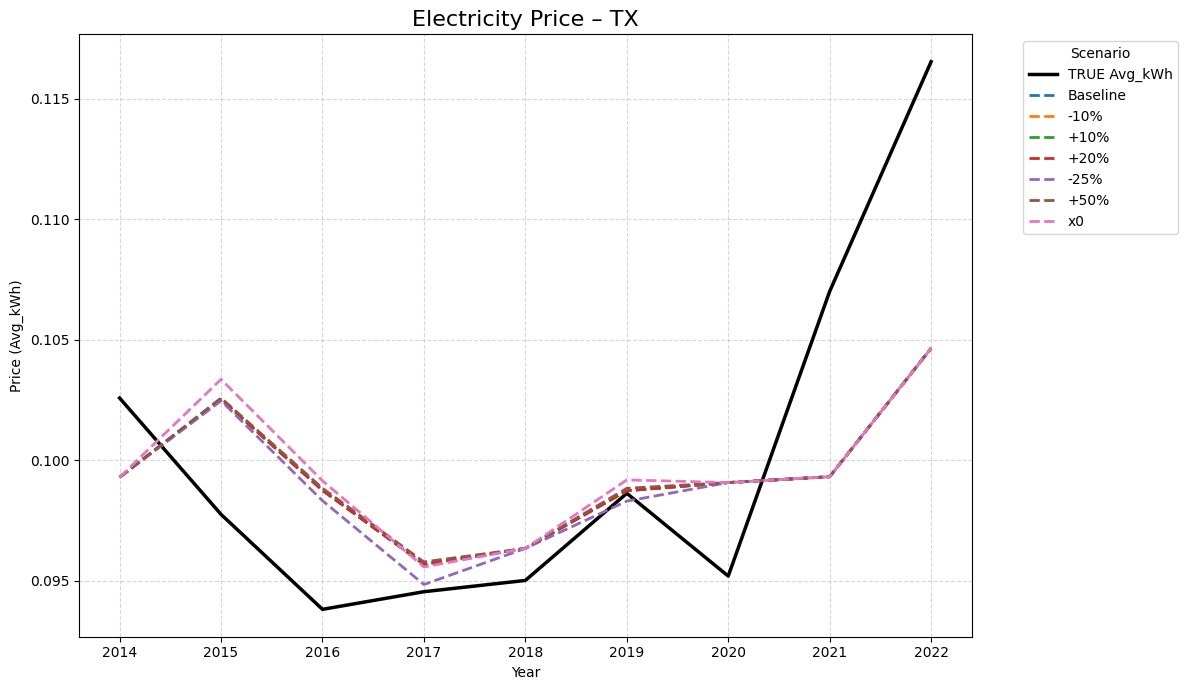

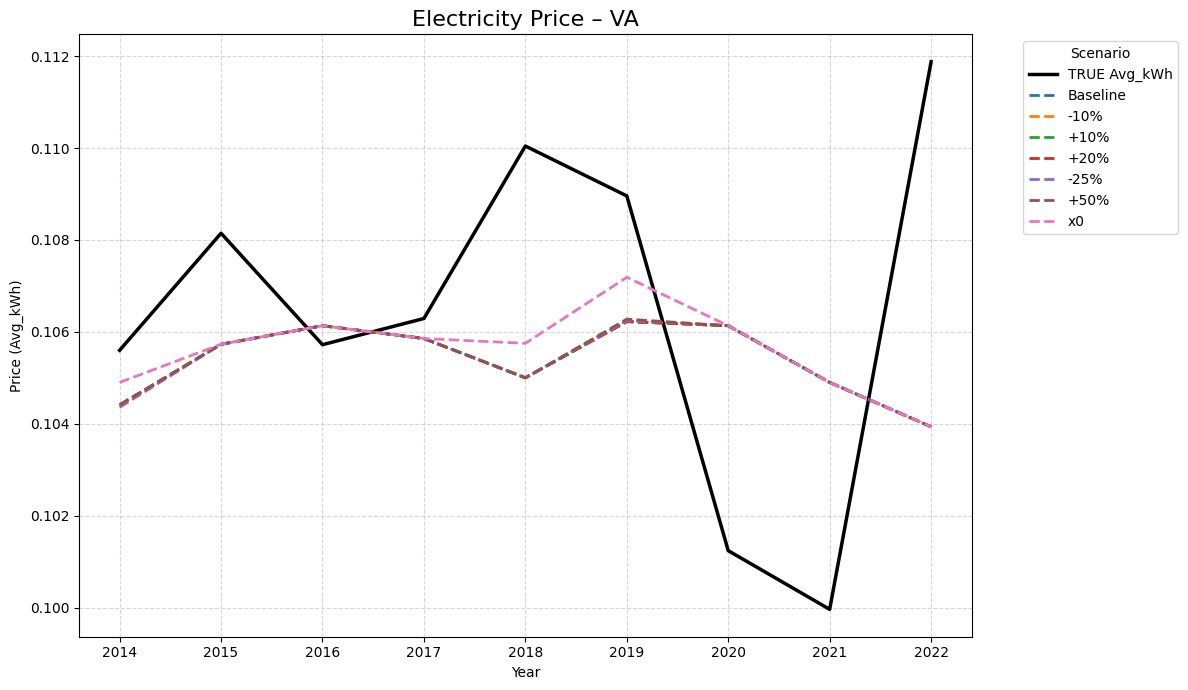

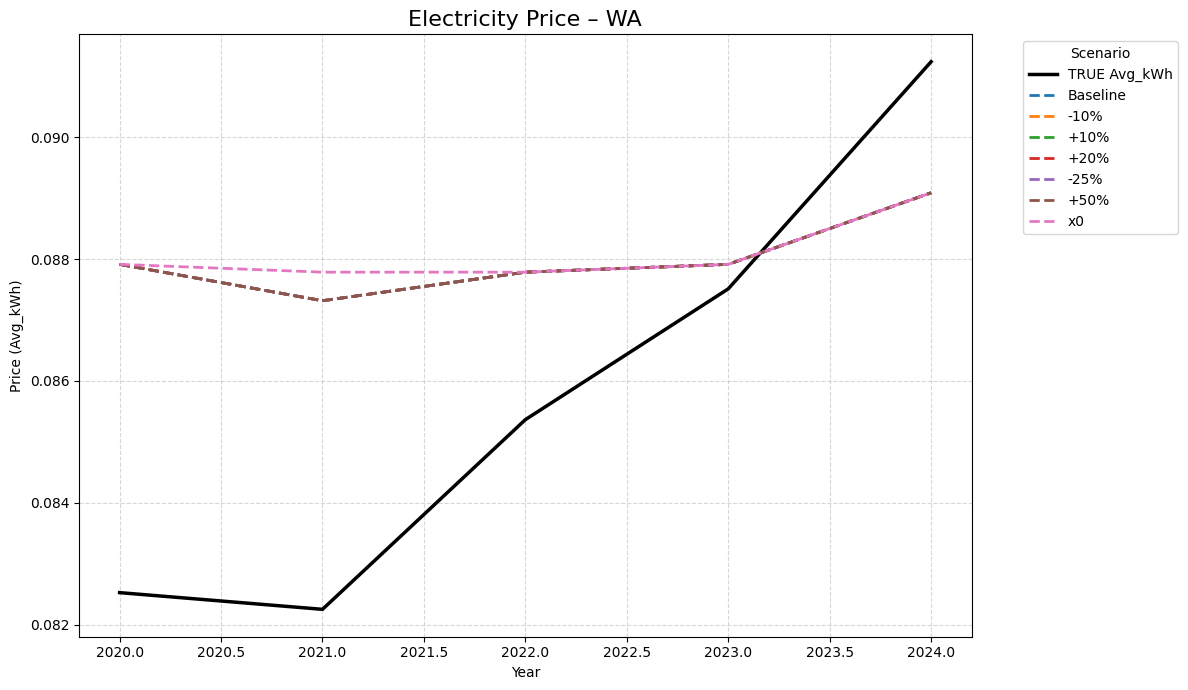

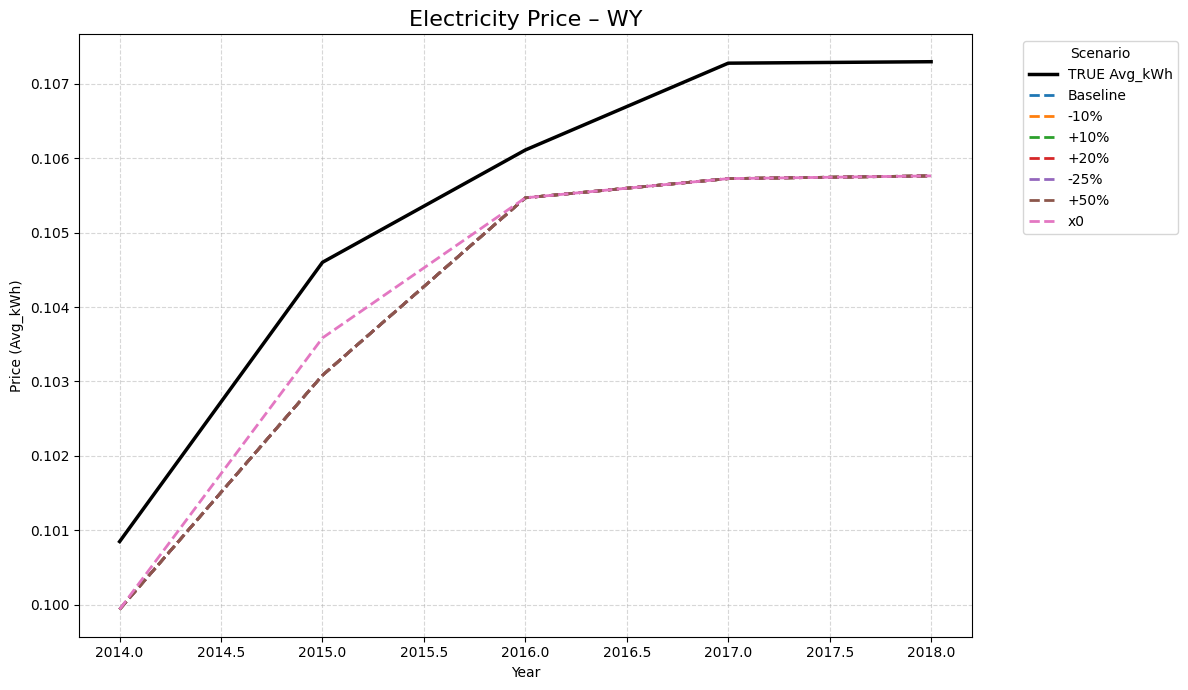

In [21]:
# Colors assigned *once* and reused for every plot for each scenario now
scenario_names = [name for _, name in scenario_columns]

cmap = get_cmap("tab10")
scenario_colors = {name: cmap(i % 10) for i, name in enumerate(scenario_names)}

states = sorted(df["State"].unique())

for state in states:
    sdata = df[df["State"] == state].sort_values("Year")

    plt.figure(figsize=(12, 7))

    # --- TRUE DATA (solid black line)
    plt.plot(
        sdata["Year"],
        sdata["Avg_kWh"],
        color="black",
        linewidth=2.5,
        label="TRUE Avg_kWh"
    )

    # --- SCENARIOS (dashed lines, consistent colors)
    for col, name in scenario_columns:
        plt.plot(
            sdata["Year"],
            sdata[col],
            linestyle="--",
            linewidth=2,
            color=scenario_colors[name],
            label=name
        )

    plt.title(f"Electricity Price – {state}", fontsize=16)
    plt.xlabel("Year")
    plt.ylabel("Price (Avg_kWh)")

    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend(title="Scenario", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()

    # Save if desired:
    # plt.savefig(f"{state}_scenarios.png", dpi=200)

    plt.show()
